In [1]:
from sklearn import datasets
house =  datasets.load_boston()
house.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
# 取出 Ｘ特徵, y標籤
X, y = house['data'], house['target']

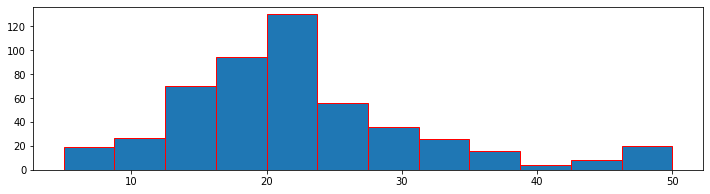

In [3]:
# EDA exploratory data analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.hist(y, edgecolor = 'red', bins=12)
plt.show()

(506, 13)


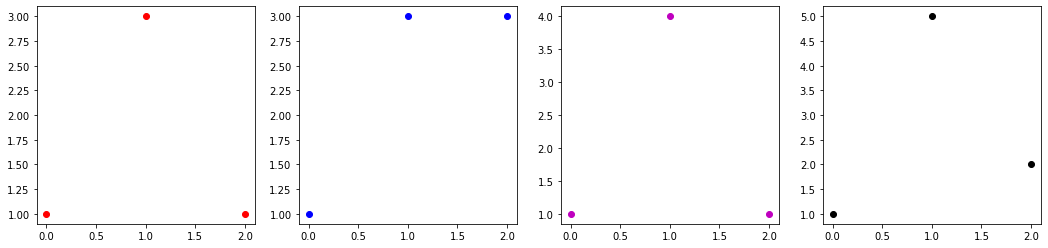

In [4]:
# 倆倆關聯 每個 X 特徵 跟 y 的關係
print(X.shape)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(18,4))
ax1 = fig.add_subplot(1, 4, 1)
ax1.scatter(range(3), np.random.randint(1, 6, (3,)), color='red')

ax2 = fig.add_subplot(1, 4, 2)
ax2.scatter(range(3), np.random.randint(1, 6, (3,)), color='blue')

ax3 = fig.add_subplot(1, 4, 3)
ax3.scatter(range(3), np.random.randint(1, 6, (3,)), color='m')

ax3 = fig.add_subplot(1, 4, 4)
ax3.scatter(range(3), np.random.randint(1, 6, (3,)), color='black')
plt.show()

(506, 13)


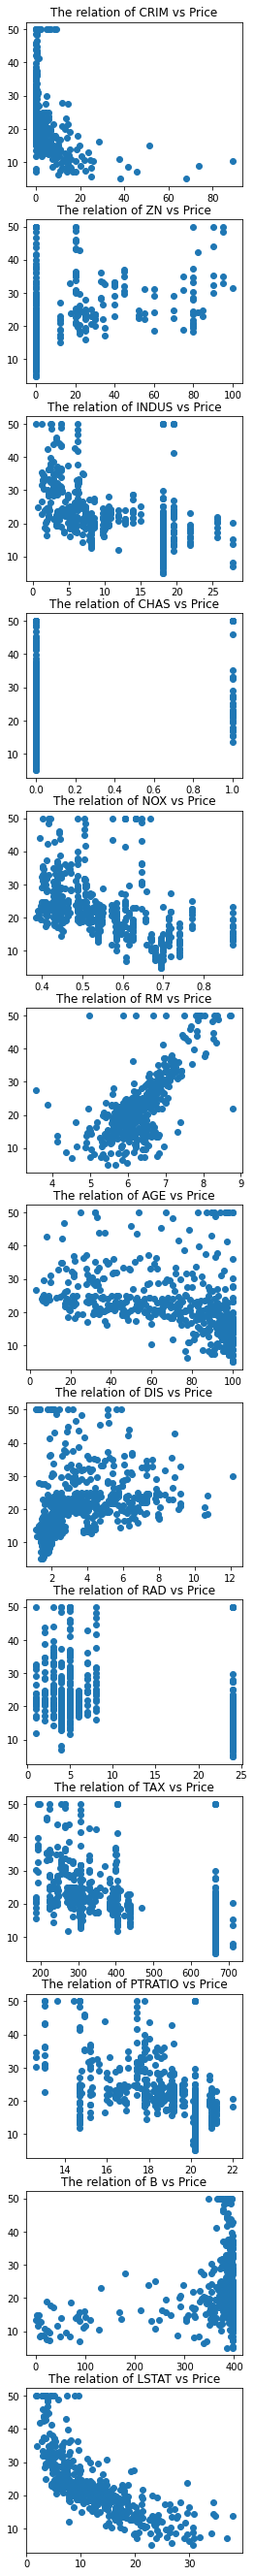

In [5]:
# 倆倆關聯 每個 X 特徵 跟 y 的關係
print(X.shape)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(4,48))
 
for i in range(X.shape[1]):
    ax = fig.add_subplot(X.shape[1], 1, i+1)
    ax.set_title('The relation of {} vs Price'.format(house['feature_names'][i]) )
    ax.scatter(X[:, i], y)

plt.show()

(506, 13)


<ipython-input-6-b1d63c29b5b0>:10: RuntimeWarning: divide by zero encountered in log
  ax.scatter(np.log(X[:, i]), np.log(y) )


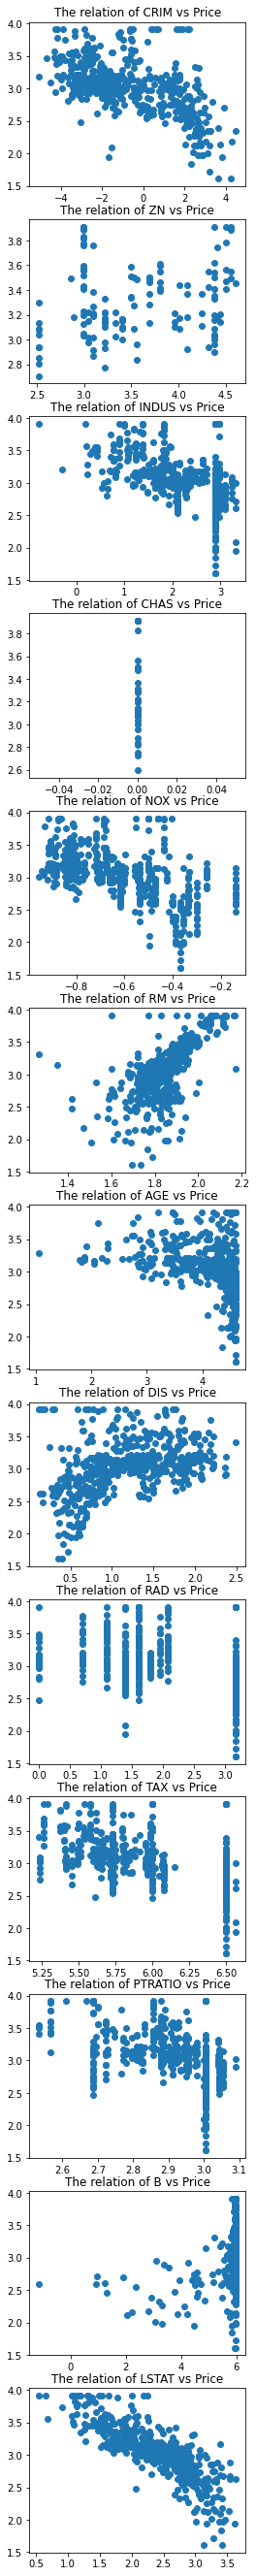

In [6]:
# 倆倆關聯 每個 X 特徵 跟 y 的關係
print(X.shape)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(4,48))
 
for i in range(X.shape[1]):
    ax = fig.add_subplot(X.shape[1], 1, i+1)
    ax.set_title('The relation of {} vs Price'.format(house['feature_names'][i]) )
    ax.scatter(np.log(X[:, i]), np.log(y) )

plt.show()

In [7]:
# 加入資料標準化
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler() # StandardScaler()
X_ss = ss.fit_transform(X)

In [8]:
# 區分訓練與驗證數據 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=42)

In [9]:
# 選擇模型 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7508856358979673, 0.6687594935356318)

In [10]:
# 預測
y_pred = model.predict(X_test)
import pandas as pd
df = pd.DataFrame(X_test, columns = house['feature_names'])
df['TARGET'] = y_test
df['PREDICT'] = y_pred
df['DIFF%'] = np.abs(df['TARGET'] - df['PREDICT']) / df['TARGET'].astype('float32') * 100
df['DIFF'] = np.abs(df['TARGET'] - df['PREDICT']) 
df.iloc[:, -4:].sort_values(by='DIFF%', ascending = False)

,TARGET,PREDICT,DIFF%,DIFF
12,7.0,-6.088422,186.977455,13.088422
97,17.9,-0.164237,100.917527,18.064237
32,15.0,25.939096,72.927304,10.939096
78,10.9,18.765487,72.160433,7.865487
66,13.1,20.523849,56.670601,7.423849
...,...,...,...,...
82,20.9,20.739637,0.767287,0.160363
68,30.8,30.616080,0.597144,0.183920
43,17.4,17.327450,0.416951,0.072550
80,20.9,20.830769,0.331248,0.069231


<AxesSubplot:ylabel='Frequency'>

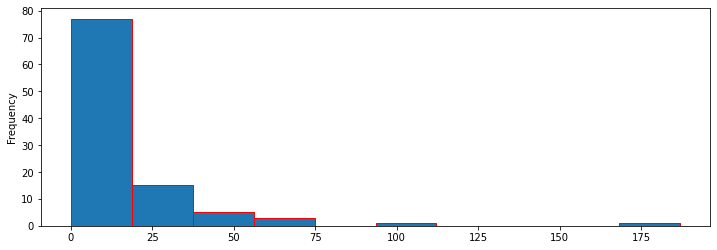

In [11]:
# 根據錯誤差距%狀況 繪製圖表
df.loc[:, 'DIFF%'].plot(kind='hist', figsize=(12,4), edgecolor = 'red')

<AxesSubplot:ylabel='Frequency'>

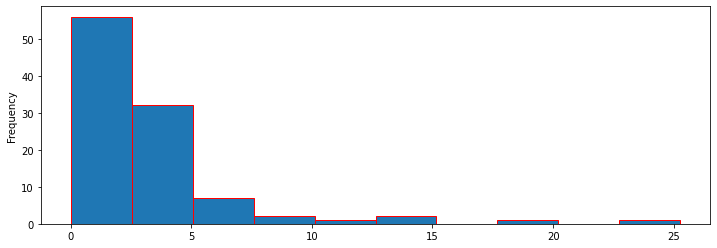

In [12]:
# 根據錯誤差距狀況 繪製圖表
df.loc[:, 'DIFF'].plot(kind='hist', figsize=(12,4), edgecolor = 'red')

In [13]:
# 顯示回歸的數據
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) * 100 

66.87594935356319